In [1]:
%run ./tools.ipynb
# import all the necessary modules 
# import all functions needed to post process


In [ ]:
# complete post processing for one month of ensemble simulation

In [ ]:
%%bash

year=2018

for month in 1 2 3 4 5 6 7 8 10 11 12
do
    cd /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/
    
    # add 0 before the month string if it is smaller than 10
    if [ $month -gt 9 ];
    then
    month_string="$month"
    else
    month_string="0$month"
    fi

    # case directory
    cd CO2-$year-$month_string
    pwd
    
    mkdir nd51
    mv ts_satellite.* nd51
    cp tracerinfo.dat nd51
    cp diaginfo.dat nd51

done

In [2]:
%%time
### this cell could do all post-processing for a case, over a few months, or one month

year = 2018

for imonth in range(3,4):
#imonth = 4
    case_name = 'CO2-2018-' + month_string(imonth)
    mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/nd51/'

    bpch_to_nc_mass(data_dir = mod_dir,
                        year = year,
                        month = imonth)

    combine_daily_to_one(data_dir = mod_dir,
                         year = year,
                         month = imonth,
                         str1 = 'ts_satellite.',
                         str2 = '.nc')

    flatten_4d_to_2d(data_dir = mod_dir,
                         year = year,
                         month = imonth,
                         str1 = 'ts_satellite.',
                         str2 = '.nc')

    interpolate_model_to_satellite(mod_dir = mod_dir, 
                                       sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
                                       year = year, 
                                       month = imonth, 
                                       str1_mod = '2d_ts_satellite.', 
                                       str1_sat = '2d_OCO2_extract_')
    delta_Y(mod_dir = mod_dir, 
            sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
            year = year, 
            month = imonth, 
            str1_mod = 'interpolated_2d_ts_satellite.', 
            str1_sat = '2d_OCO2_extract_',
            mode = 'N')


converted daily bpch outputs to netcdf format
created ts_satellite.201803.nc
created 2d_ts_satellite.201803.nc
interpolation began
SpeciesConc_CO2Tag1 done
SpeciesConc_CO2Tag2 done
SpeciesConc_CO2Tag3 done
SpeciesConc_CO2Tag4 done
SpeciesConc_CO2Tag5 done
SpeciesConc_CO2Tag6 done
SpeciesConc_CO2Tag7 done
SpeciesConc_CO2Tag8 done
SpeciesConc_CO2Tag9 done
SpeciesConc_CO2Tag10 done
SpeciesConc_CO2Tag11 done
SpeciesConc_CO2Tag12 done
SpeciesConc_CO2Tag13 done
SpeciesConc_CO2Tag14 done
SpeciesConc_CO2Tag15 done
SpeciesConc_CO2Tag16 done
SpeciesConc_CO2Tag17 done
SpeciesConc_CO2Tag18 done
SpeciesConc_CO2Tag19 done
SpeciesConc_CO2Tag20 done
SpeciesConc_CO2Tag21 done
SpeciesConc_CO2Tag22 done
created interpolated_2d_ts_satellite.201803.nc
created delta_y0_model_N_3.nc
CPU times: user 15min 22s, sys: 41.6 s, total: 16min 4s
Wall time: 19min 1s


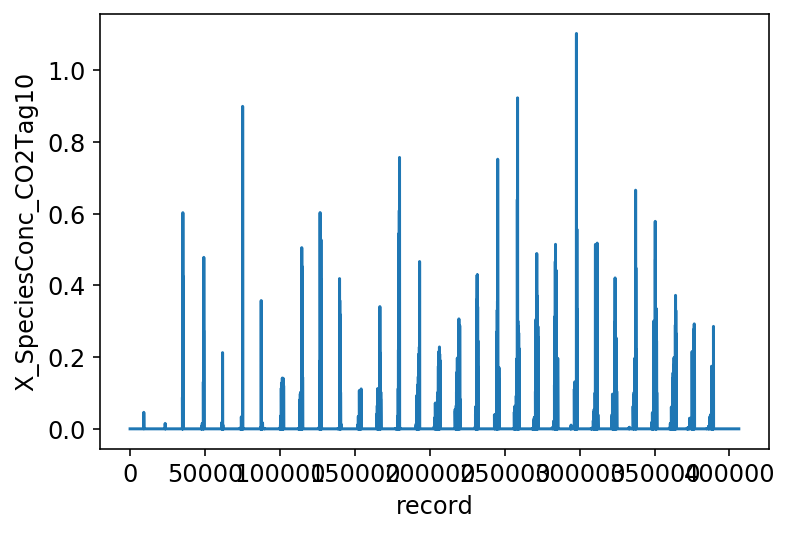

In [5]:
mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018-03/nd51/'
fname = 'delta_y0_model_N_3.nc'
#fname = '2d_ts_satellite.201803.nc'
ds = xr.open_dataset(mod_dir + fname)
ds['X_SpeciesConc_CO2Tag10'].plot()